# Otto商品分类——Logistic 回归
## 原始特征+tfidf特征

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dpath = './data/'

train1 = pd.read_csv(dpath + "Otto_FE_train_org.csv")
train2 = pd.read_csv(dpath + "Otto_FE_train_tfidf.csv")

# 去掉多余的id
train2 = train2.drop(["id", "target"], axis=1)
train = pd.concat([train1, train2], axis=1, ignore_index=False)

del train1
del train2

train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,1,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.075886,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,4,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,...,0.460983,0.000000,0.008244,0.022456,0.0,0.0,0.000000,0.0,0.0,0.0
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.124622,0.000000,0.000000,0.0,0.0,0.145988,0.0,0.0,0.0


In [3]:
y_train = train['target']   
X_train = train.drop(["id", "target"], axis=1)
feat_names = X_train.columns 

from scipy.sparse import csr_matrix

X_train = csr_matrix(X_train)

In [4]:
# 默认参数的Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
loss = cross_val_score(lr, X_train, y_train, cv=3, scoring='neg_log_loss')

print('logloss of each fold is: ', loss)
print('mean cv logloss is:', -loss.mean())

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logisti

logloss of each fold is:  [-0.63005759 -0.63058612 -0.62210652]
mean cv logloss is: 0.627583409221168


原始特征：0.79 

log特征：0.68 

tfidf特征：0.64

原始特征 + tfidf特征：0.62

In [5]:
# 正则化的 Logistic Regression及参数调优
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Cs = [ 0.1, 1, 10, 100, 1000]
penaltys = ['l1','l2']
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty = LogisticRegression()
grid = GridSearchCV(lr_penalty, tuned_parameters, cv=3, scoring='neg_log_loss', n_jobs=-1, return_train_score=True)
grid.fit(X_train,y_train)

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_log_loss', verbose=0)

In [6]:
print(-grid.best_score_)
print(grid.best_params_)

0.6067406531315321
{'C': 10, 'penalty': 'l1'}


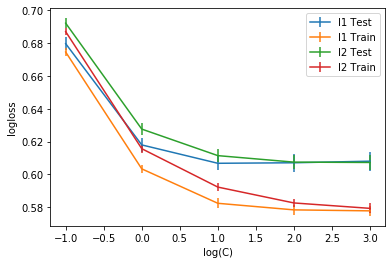

In [7]:
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]

# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs, number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs, number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs, number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs, number_penaltys)

x_axis = np.log10(Cs)
for i in range(number_penaltys):
    plt.errorbar(x_axis, -test_scores[:,i], yerr=test_stds[:,i], label = penaltys[i] + ' Test')
    plt.errorbar(x_axis, -train_scores[:,i], yerr=train_stds[:,i], label = penaltys[i] + ' Train')
    
plt.legend()
plt.xlabel('log(C)')                                                                                                      
plt.ylabel('logloss')
plt.show()

In [8]:
# 保存模型，用于后续测试
import pickle

pickle.dump(grid.best_estimator_, open("Otto_L1_org_and_tfidf.pkl", 'wb'))